# Classificando dígitos escritos à mão

## 0. Carregando as bibliotecas necessárias

In [1]:
using DelimitedFiles
using Plots
using Random
using Statistics: mean

## 1. Obtendo e preparando os dados 

### 1.1. Lendo os arquivos (databases) que contêm os dados

In [2]:
train_dataset = readdlm("./MNIST/mnist_train.csv", ',', Float64, '\n'; header=true)
train_dataset = reshape(train_dataset[1], 60000, 785)

test_dataset = readdlm("./MNIST/mnist_test.csv", ',', Float64, '\n'; header=true)
test_dataset = reshape(test_dataset[1], 10000, 785)

10000×785 Matrix{Float64}:
 7.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 9.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 9.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 6.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 9.0  0.0  0.0  0.0  0.0  0.0  0.0  0

### 1.2. Definido os conjuntos X e Y de treinamento e de teste

In [3]:
digito_1 = 1.0 # dígito correspondente à "classe 1"
digito_2 = 7.0 # dígito correspondente à "classe 2"
digito_3 = 9.0 # dígito correspondente à "classe 3"
digito_4 = 6.0 # dígito correspondente à "classe 4"

idx_digito_1_train = train_dataset[:,1] .== digito_1
idx_digito_2_train = train_dataset[:,1] .== digito_2
idx_digito_3_train = train_dataset[:,1] .== digito_3
idx_digito_4_train = train_dataset[:,1] .== digito_4
idx_digito_1_test = test_dataset[:,1] .== digito_1
idx_digito_2_test = test_dataset[:,1] .== digito_2
idx_digito_3_test = test_dataset[:,1] .== digito_3
idx_digito_4_test = test_dataset[:,1] .== digito_4

nsamples_digito_1_train = sum(idx_digito_1_train)
nsamples_digito_2_train = sum(idx_digito_2_train)
nsamples_digito_3_train = sum(idx_digito_3_train)
nsamples_digito_4_train = sum(idx_digito_4_train)
nsamples_digito_1_test = sum(idx_digito_1_test)
nsamples_digito_2_test = sum(idx_digito_2_test)
nsamples_digito_3_test = sum(idx_digito_3_test)
nsamples_digito_4_test = sum(idx_digito_4_test)

958

In [4]:
X_train = hcat( 
    transpose(train_dataset[idx_digito_1_train,2:end] ./ 255.0),
    transpose(train_dataset[idx_digito_2_train,2:end] ./ 255.0),
    transpose(train_dataset[idx_digito_3_train,2:end] ./ 255.0),
    transpose(train_dataset[idx_digito_4_train,2:end] ./ 255.0)
)

X_test = hcat(
    transpose(test_dataset[idx_digito_1_test,2:end] ./ 255.0),
    transpose(test_dataset[idx_digito_2_test,2:end] ./ 255.0),
    transpose(test_dataset[idx_digito_3_test,2:end] ./ 255.0),
    transpose(test_dataset[idx_digito_4_test,2:end] ./ 255.0)
)

# one-hot encoding
# (tamanho, onde_é_1)

Y_train = hcat( 
    [[1,0,0,0] for _ in 1:nsamples_digito_1_train]...,
    [[0,1,0,0] for _ in 1:nsamples_digito_2_train]...,
    [[0,0,1,0] for _ in 1:nsamples_digito_3_train]...,
    [[0,0,0,1] for _ in 1:nsamples_digito_4_train]...
    )

Y_test = hcat( 
    [[1,0,0,0] for _ in 1:nsamples_digito_1_test]...,
    [[0,1,0,0] for _ in 1:nsamples_digito_2_test]...,
    [[0,0,1,0] for _ in 1:nsamples_digito_3_test]...,
    [[0,0,0,1] for _ in 1:nsamples_digito_4_test]...
    )

println(size(X_train))
println(size(X_test))
println(size(Y_train))
println(size(Y_test))

(784, 24874)
(784, 4130)
(4, 24874)
(4, 4130)


### 1.3. Explorando um pouco o conjunto de dados

In [ ]:
smpl = 15000
println("Este dígito pertence à classe ", Y_train[:,smpl])
heatmap(transpose(reshape(X_train[:,smpl], 28, 28)); yflip=true)

## 2. estrutura da rede neural

In [9]:
linear(x) = x
d_linear(x) = 1.0

sigmoid(x) = 1 / (1 + exp(-x))
d_sigmoid(x) = sigmoid(x) * (1 - sigmoid(x))

#tanh(x) o julia ja sabe
d_tanh(x) = 1 - tanh(x)^2

function onecoldencoding(M)
    n = size(M,2)
    onecold = zeros(n)
    for sample in 1:n
        onecold[sample] = findall(M[:,sample] .== maximum(M[:,sample]))[1]
    end
    return onecold
end

onecoldVector = zeros(size(Y_test))

function onecoldencoding!(M, onecoldVector)
    d, n = size(M)
    for sample in 1:n
        maxx = M[1,sample]
        for m in @view(M[:, sample])
            if (m >= maxx)
                onecoldVector[sample] = m
                maxx = m
            end
        end
    end
    return onecold
end

function predict(
        X, # Matrizona de dados (m x n), m covariáveis e n amostras
        W, # Matrizona de pesos das combinações lineares (d x m), d neurônios na cada atual e m na camada anterior
        B, # Vetorzão coluna de coef lienares das combinações (d elementos), d neurônios
        f_a # Função de ativação
    )
    return f_a.(W * X .+ B)
end

function accuracy(W, B, X, Y, f_a)
    Y_predictions = predict(X, W, B, f_a)
    acc = mean(onecoldencoding(Y_predictions) .== onecoldencoding(Y))
    return(acc)
end

accuracy (generic function with 1 method)

In [ ]:
#using Flux
#using Flux: onecold
#using Pkg;
#Pkg.add("BenchmarkTools")
#using BenchmarkTools

onecoldencoding!(predict(X_test, W, B, sigmoid), onecoldVector);

#@btime Flux.onecold(predict($X_test, $W, $B, $sigmoid));

In [11]:
function computar_gradiente(X, Y, W, B, f_a, df_a)
    
    N_neurons, N_inputs = size(W) # como W é uma matriz, size(W) retorna (N_linhas, N_colunas))
    N_amostras = size(X,2) # como X é uma matriz, size(X, 2) retorna N_colunas)
    
    dW = zeros(N_neurons, N_inputs)
    dB = zeros(N_neurons)
    loss = 0.0

    for amostra in 1:N_amostras # para cada amostra
        for neuron in 1:N_neurons # para cada neuron
            
            erro = f_a(W[neuron, :]' * X[:, amostra] + B[neuron]) - Y[neuron, amostra] # o erro é a diferença entre o valor obtido e o valor real
            
            for input in 1:N_inputs # para cada input            
                @views dW[neuron, input] += (2/N_amostras) * erro * df_a(W[neuron, :]' * X[:,amostra] + B[neuron]) * X[input,amostra]
            end # para cada input
            
            @views dB[neuron] += (2/N_amostras) * erro * df_a(W[neuron, :]' * X[:,amostra] + B[neuron])
            loss += 1/N_amostras * erro^2
            
        end # para cada neuron
    end #para cada amostra
    
    #println(dW)
    #println(dB)
    
    return dW, dB, loss
    
end

computar_gradiente (generic function with 1 method)

In [12]:
function treinar_rede_neural_2_comgrafico(
        X_train, Y_train, # conjunto de treinamento
        X_test, Y_test, # conjunto de teste
        W0, B0, # parâmetros da rede
        grad_loss, # função que computa o gradiente
        f_a, df_a, # função de ativação e sua derivada
        mu, n_iters, batch_size # hiperparâmetros do modelo
        )
    
    W = W0
    B = B0
    losses = zeros(n_iters)
    train_accs = zeros(n_iters)
    test_accs = zeros(n_iters)  
  
    for iteration in 1:n_iters
        
        batch_idx = randperm(size(X_train,2))[1:batch_size] # selectionando as amostras do batch
        
        dW, dB, losses[iteration] = grad_loss(X_train[:, batch_idx], Y_train[:, batch_idx], W, B, f_a, df_a) # computando os gradientes
        
        W -= mu * dW # atualizando W conforme seus gradientes
        B -= mu * dB # atualizando B conforme seus gradientes
        
        train_accs[iteration] = accuracy(W, B, X_train, Y_train, f_a)
        test_accs[iteration] = accuracy(W, B, X_test, Y_test, f_a)

        ##### Para plotar a "loss" ao longo das iterações...
        #
        loss_i = round(losses[iteration]; digits = 6)
        train_acc_i = round(train_accs[iteration]; digits = 6)
        test_acc_i = round(test_accs[iteration]; digits = 6)
         
        IJulia.clear_output(true)
        loss_plot = scatter(
            [1:10:iteration], losses[1:10:iteration];
            yscale=:log10,
            xlabel="iteration",
            ylabel="training loss",
            title="iteration $iteration, loss = $loss_i, tr. acc. = $train_acc_i, ts. acc. = $test_acc_i",
            titlefontsize=10
            )
        display(loss_plot)
        #
        #####
        
    end
    
    return(W, B, losses)
end

treinar_rede_neural_2_comgrafico (generic function with 1 method)

## Realizando o treinamento

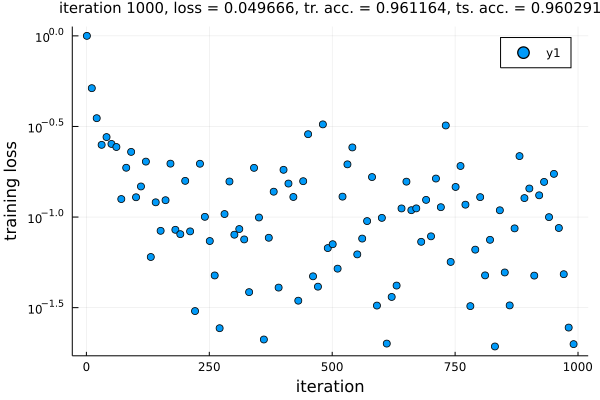

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [-0.010355414968244644, -0.17134582904375695, -0.4592492702521707, -0.26324690908224807], [1.0000000000000004, 0.8168373784106895, 0.7457745679024018, 0.6259707193003465, 0.6451633556284306, 0.5286393020411603, 0.68019119411472, 0.48554826329772066, 0.5385179015712277, 0.5408730819333225  …  0.019892582771819774, 0.03575871589605657, 0.12717259712064763, 0.06374685180900996, 0.02432056223850354, 0.02094936771459312, 0.05714753702941118, 0.01634119064620262, 0.04667588034753155, 0.04966602068070651])

In [13]:
W = zeros(4,784)
B = zeros(4)

#@show(W, B, accuracy(W, B, X_train, Y_train, sigmoid))

mu = 1e-1
n_iters = 1000

W, B, losses = treinar_rede_neural_2_comgrafico(
    X_train,Y_train,X_test,Y_test,
    W, B, computar_gradiente, sigmoid, d_sigmoid, mu, n_iters, 10)

## Observando o resultado do treinamento

4130
174
Este dígito pertence à classe [1, 0, 0, 0] e foi estimado como [0.9560810989826133, 0.020452181265391552, 0.032457914643165636, 0.016108103424090154]


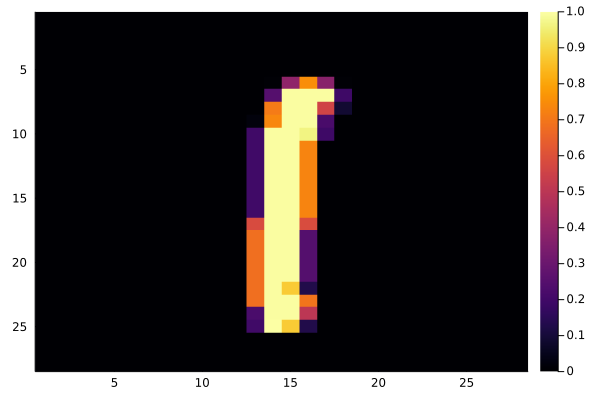

In [187]:
println(size(X_test,2))
smpl = 174#round(Int64,rand()*(size(X_test,2)))
#smpl = smpl == 0 ? 1 : smpl
println(smpl)
println("Este dígito pertence à classe ", Y_test[:,smpl], " e foi estimado como ", predict(X_test[:,smpl], W, B, sigmoid))
heatmap(transpose(reshape(X_test[:,smpl], 28, 28)); yflip=true)

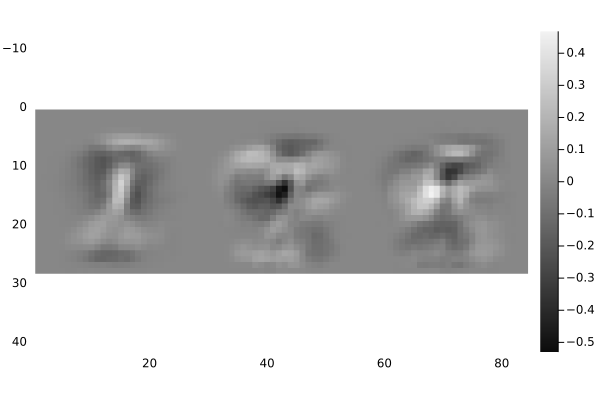

In [86]:
heatmap(
    permutedims(vcat(mapslices(v -> [reshape(v, 28, 28)], W; dims=2)...));
    showaxis=false,
    grid=false,
    transpose=true,
    yflip=true,
    color=:grays,
    aspect_ratio=1.0
)